# Searching for Dark Matter in ATLAS Proton-Proton Experiments Using Genetic Algorithms

#### Rohan Arni

In [35]:
import numpy as np
import pandas as pd
from deap import base, creator, tools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
from sklearn.mixture import GaussianMixture
import seaborn as sns

In [36]:
dataset = pd.read_csv('data/data.csv')
subset_data = dataset.sample(n=1000, random_state=42)

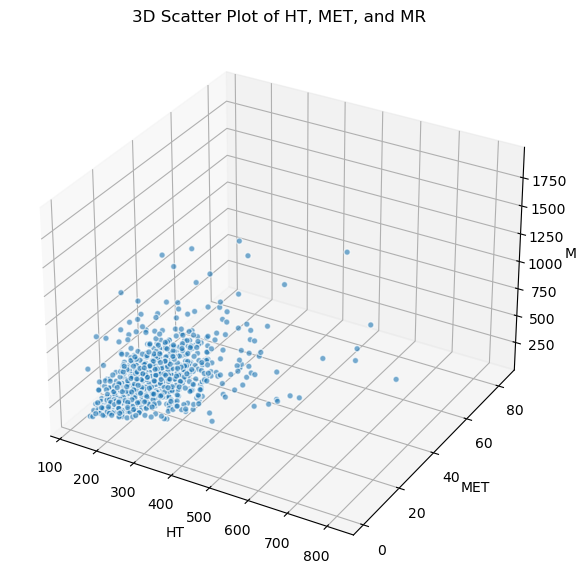

In [37]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


sc = ax.scatter(subset_data['HT'], subset_data['MET'], subset_data['MR'],  alpha=0.6, edgecolors='w', marker='o')

ax.set_xlabel('HT')
ax.set_ylabel('MET')
ax.set_zlabel('MR')
ax.set_title('3D Scatter Plot of HT, MET, and MR')

plt.show()

In [38]:
BASE_LENGTH = 10
POPULATION_SIZE = 100

Q1_HT = dataset['HT'].quantile(0.25)
Q3_HT = dataset['HT'].quantile(0.75)
Q1_MET = dataset['MET'].quantile(0.25)
Q3_MET = dataset['MET'].quantile(0.75)

IQR_HT = Q3_HT - Q1_HT
IQR_MET = Q3_MET - Q1_MET

multiplier = 1.0
lower_bound_HT = Q1_HT - multiplier * IQR_HT
upper_bound_HT = Q3_HT + multiplier * IQR_HT
lower_bound_MET = Q1_MET - multiplier * IQR_MET
upper_bound_MET = Q3_MET + multiplier * IQR_MET

In [39]:
def calculate_outlierness(individual):
    index = int(''.join(map(str, individual)), 2)
    index = index % len(dataset)

    HT_val = dataset['HT'].iloc[index]
    MET_val = dataset['MET'].iloc[index]

    outlierness = 0
    if HT_val < lower_bound_HT or HT_val > upper_bound_HT:
        outlierness += 1
    if MET_val < lower_bound_MET or MET_val > upper_bound_MET:
        outlierness += 1

    return outlierness,

In [40]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, BASE_LENGTH)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", calculate_outlierness)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

/Users/rohanarni/anaconda3/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/rohanarni/anaconda3/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [41]:
def run_ga(NGEN=100, CXPB=0.7, MUTPB=0.2):
    pop = toolbox.population(n=POPULATION_SIZE)

    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit

    for gen in range(NGEN):
        offspring = toolbox.select(pop, len(pop))
        offspring = list(map(toolbox.clone, offspring))

        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        pop[:] = offspring

    return pop

def decode_individual(individual):
    return int(''.join(map(str, individual)), 2) % len(dataset) # Convert the binary string to an integer

def get_outlier_data(population):
    outlier_indices = [decode_individual(ind) for ind in population if ind.fitness.values[0] > 0] # Get the indices of the outliers
    outlier_indices = list(set(outlier_indices)) # Remove duplicates
    
    return dataset.iloc[outlier_indices] # Return the outlier data

In [42]:
final_population = run_ga(CXPB=0.7, MUTPB=0.2, NGEN=100)
top_individuals = sorted(final_population, key=lambda x: x.fitness.values[0], reverse=True)
top_individuals

[[0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
 [0, 0, 1,

In [43]:
outlier_data = get_outlier_data(final_population)
number_of_outliers = outlier_data.shape[0]
number_of_outliers

1

In [44]:
def run_ga_experiments(CXPB, MUTPB):
    results_df = pd.DataFrame()

    for i in range(100):
        final_population = run_ga(CXPB=CXPB, MUTPB=MUTPB)
        outlier_data = get_outlier_data(final_population)

        outlier_events = [i+1] + outlier_data['Event'].tolist()

        outlier_df = pd.DataFrame([outlier_events])
        
        results_df = pd.concat([results_df, outlier_df], ignore_index=True)

    num_outliers = results_df.shape[1] - 1
    results_df.columns = ['Run'] + [f'Outlier{i+1}' for i in range(num_outliers)]

    output_path = f"trials/outliers_cxpb_{CXPB}_mutpb_{MUTPB}.csv"
    results_df.to_csv(output_path, index=False)

    print (f"Results saved to {output_path}")


In [45]:
run_ga_experiments(CXPB=0.7, MUTPB=0.01)
run_ga_experiments(CXPB=0.75, MUTPB=0.05)
run_ga_experiments(CXPB=0.8, MUTPB=0.1)
run_ga_experiments(CXPB=0.85, MUTPB=0.2)
run_ga_experiments(CXPB=0.9, MUTPB=0.3)

Results saved to trials/outliers_cxpb_0.7_mutpb_0.01.csv
Results saved to trials/outliers_cxpb_0.75_mutpb_0.05.csv
Results saved to trials/outliers_cxpb_0.8_mutpb_0.1.csv
Results saved to trials/outliers_cxpb_0.85_mutpb_0.2.csv
Results saved to trials/outliers_cxpb_0.9_mutpb_0.3.csv


In [46]:
def analyze_and_plot_clusters(file_path):
    # Load the CSV file
    data = pd.read_csv(file_path)

    # Combining the Outlier columns and calculating frequencies
    outlier_data = pd.concat([data[col] for col in data.columns]).dropna()
    frequency_data = outlier_data.value_counts().reset_index()
    frequency_data.columns = ['Number', 'Frequency']

    # Range of potential number of clusters
    n_clusters = np.arange(1, 10)
    bics = []

    # Fitting GMM models and calculating BIC for each
    for n in n_clusters:
        gmm = GaussianMixture(n_components=n, random_state=0)
        gmm.fit(frequency_data[['Frequency']])
        bics.append(gmm.bic(frequency_data[['Frequency']]))

    # Identifying the number of clusters with the lowest BIC
    optimal_clusters = n_clusters[np.argmin(bics)]

    # Fitting the GMM with the optimal number of clusters
    gmm = GaussianMixture(n_components=optimal_clusters, random_state=0)
    gmm.fit(frequency_data[['Frequency']])

    # Predicting the cluster labels
    cluster_labels = gmm.predict(frequency_data[['Frequency']])

    # Adding the cluster labels to the frequency data
    frequency_data['Cluster'] = cluster_labels

    # Summary statistics for each cluster
    cluster_summary = frequency_data.groupby('Cluster')['Frequency'].agg(['count', 'mean', 'min', 'max'])

    # Sorting clusters by mean frequency
    sorted_cluster_indices = cluster_summary['mean'].sort_values().index

    # Creating a mapping from old cluster labels to new sorted labels
    cluster_mapping = {old: new for new, old in enumerate(sorted_cluster_indices, start=1)}

    # Applying the new cluster labels to the frequency data
    frequency_data['SortedCluster'] = frequency_data['Cluster'].map(cluster_mapping)

    # Recalculating the summary statistics for the newly labeled clusters
    sorted_cluster_summary = frequency_data.groupby('SortedCluster')['Frequency'].agg(['count', 'mean', 'min', 'max'])

    # Visualizations
    plt.figure(figsize=(14, 6))

    # Cluster Distribution
    plt.subplot(1, 2, 1)
    sns.countplot(x='SortedCluster', data=frequency_data, palette='viridis')
    plt.title('Distribution of Items in Each Sorted Cluster')
    plt.xlabel('Sorted Cluster')
    plt.ylabel('Number of Items')

    # Frequency Distribution by Sorted Cluster
    plt.subplot(1, 2, 2)
    sns.boxplot(x='SortedCluster', y='Frequency', data=frequency_data, palette='viridis')
    plt.title('Frequency Distribution by Sorted Cluster')
    plt.xlabel('Sorted Cluster')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

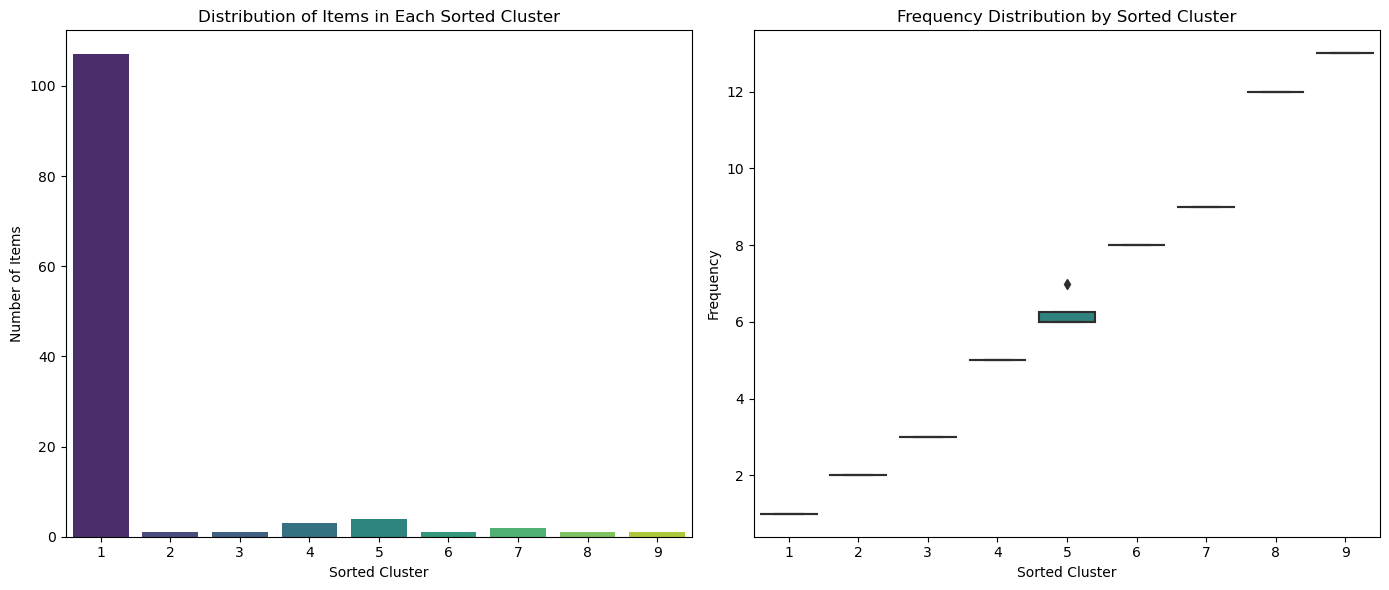

In [47]:
analyze_and_plot_clusters('trials/outliers_cxpb_0.7_mutpb_0.01.csv')

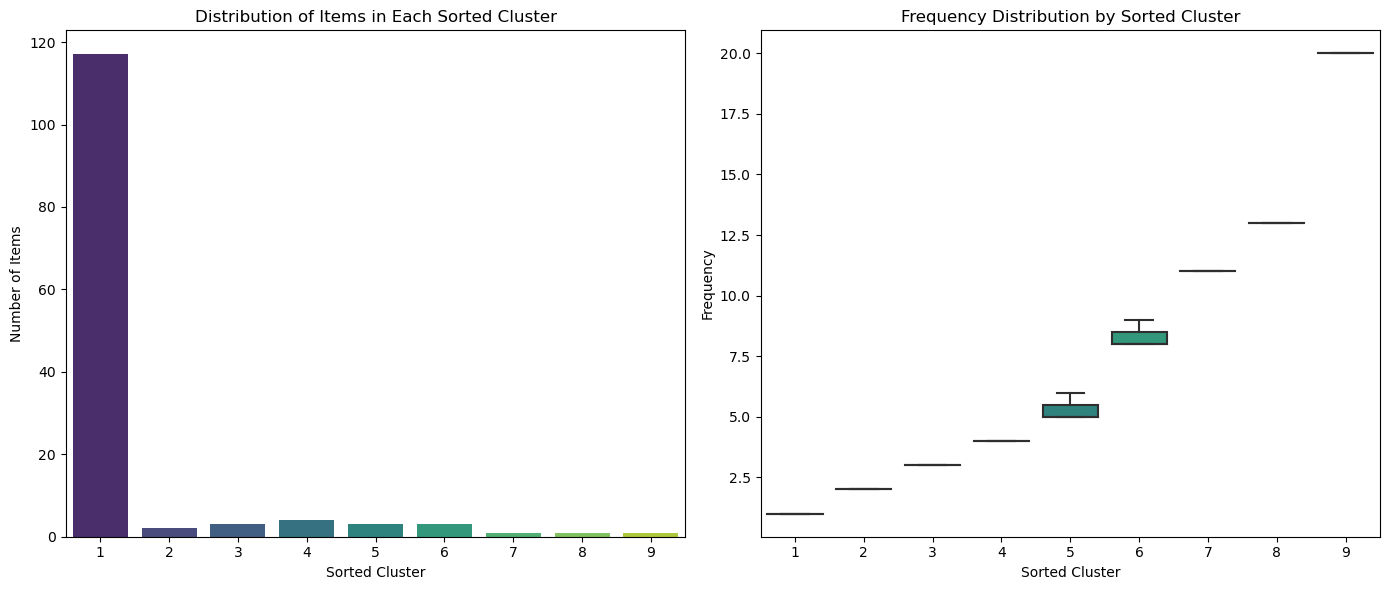

In [49]:
analyze_and_plot_clusters('trials/outliers_cxpb_0.75_mutpb_0.05.csv')

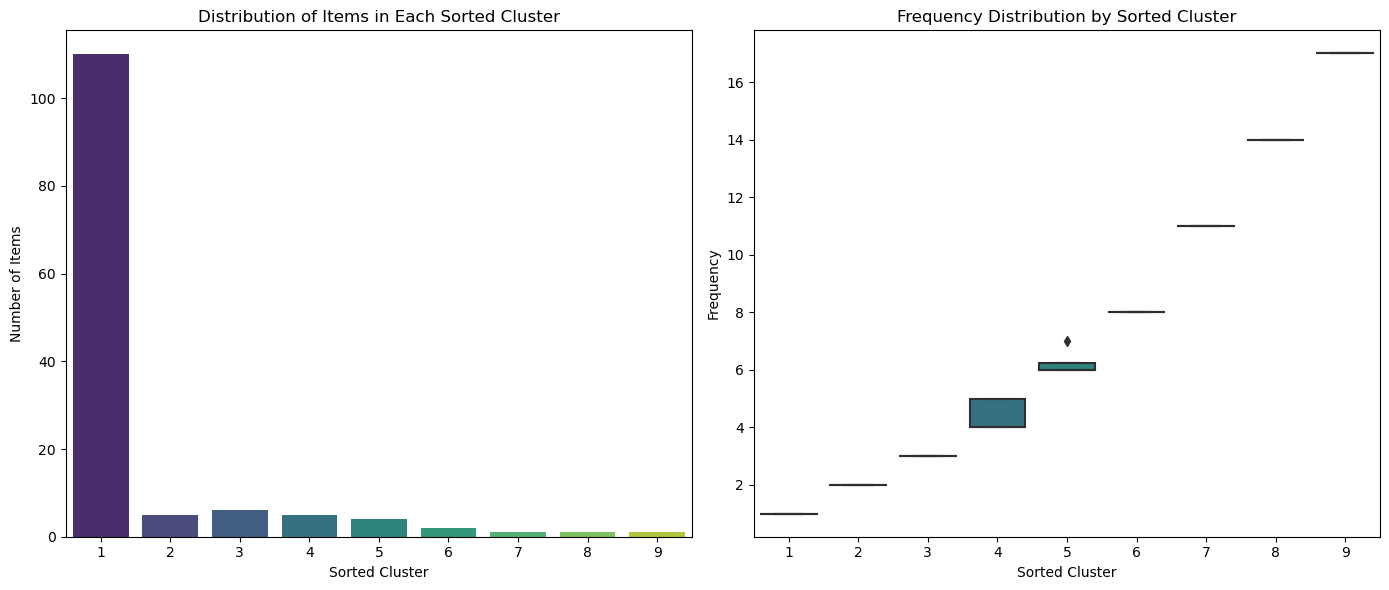

In [48]:
analyze_and_plot_clusters('trials/outliers_cxpb_0.8_mutpb_0.1.csv')

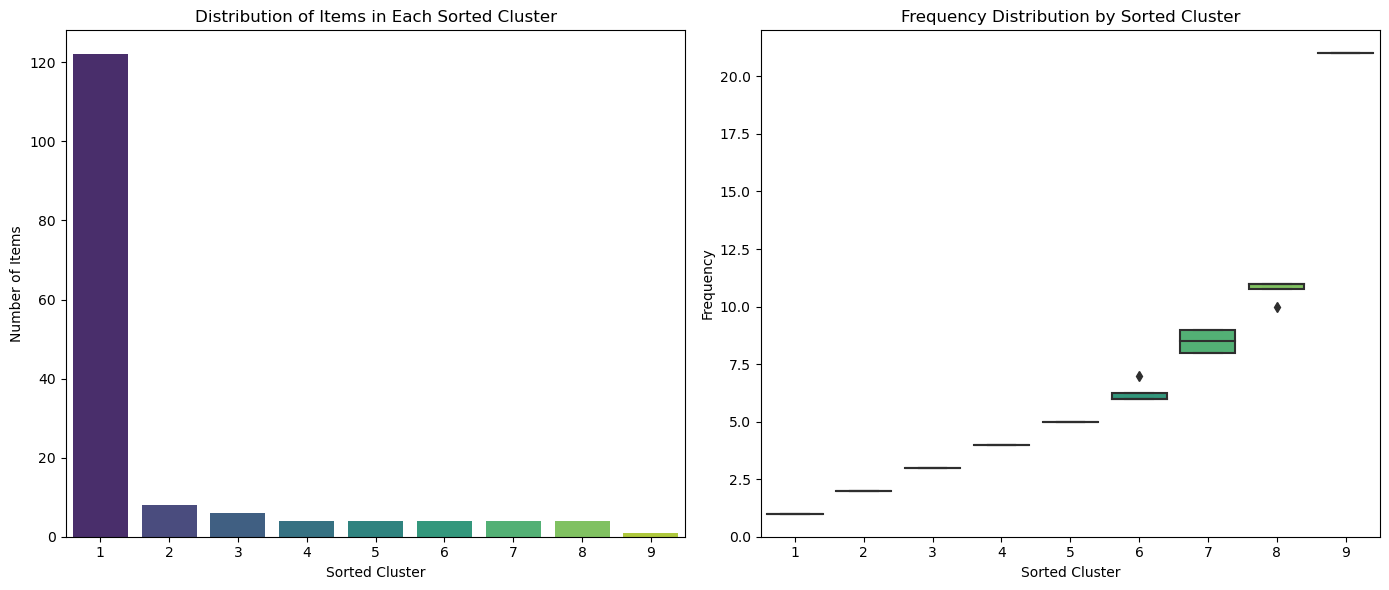

In [50]:
analyze_and_plot_clusters('trials/outliers_cxpb_0.85_mutpb_0.2.csv')

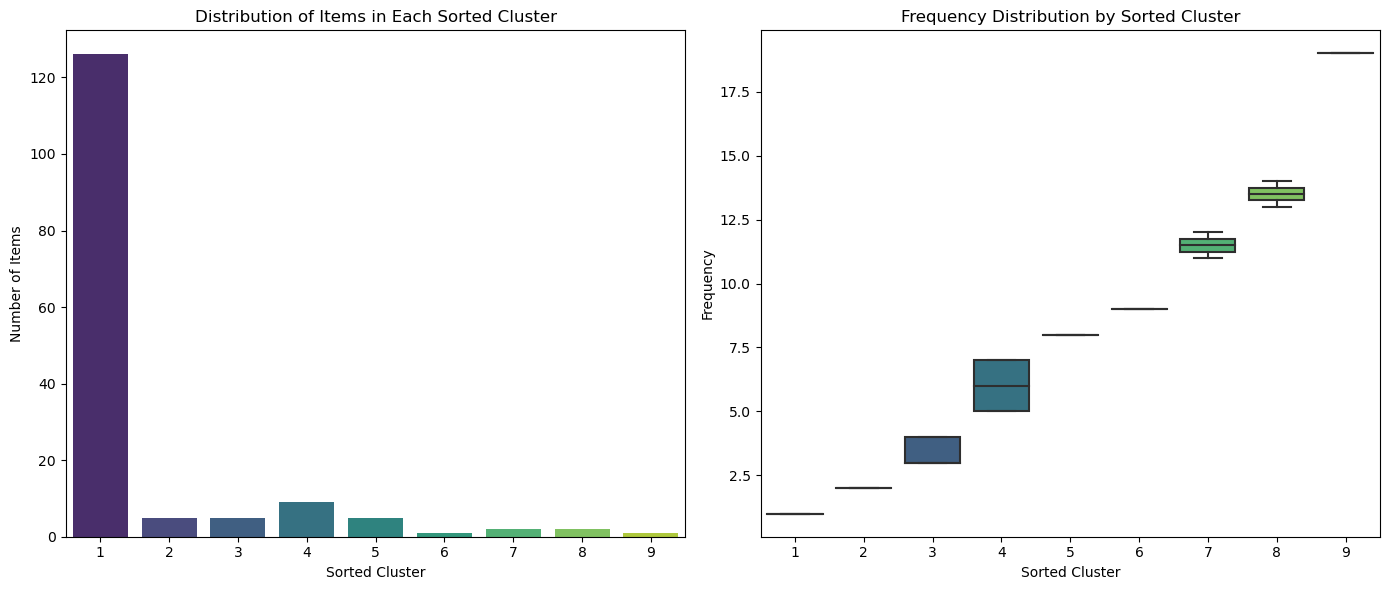

In [51]:
analyze_and_plot_clusters('trials/outliers_cxpb_0.9_mutpb_0.3.csv')